<a href="https://colab.research.google.com/github/maulannafr/Segmentasi_Citra/blob/main/Segmentasi_Cirta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 1. Segmentasi Menggunakan Thresholding Global dan Otsu

Praktikum ini bertujuan menerapkan metode segmentasi berbasis thresholding pada citra  grayscale. Mahasiswa akan membandingkan hasil thresholding dengan nilai ambang manual  (global) dan nilai ambang otomatis yang ditentukan oleh metode Otsu.

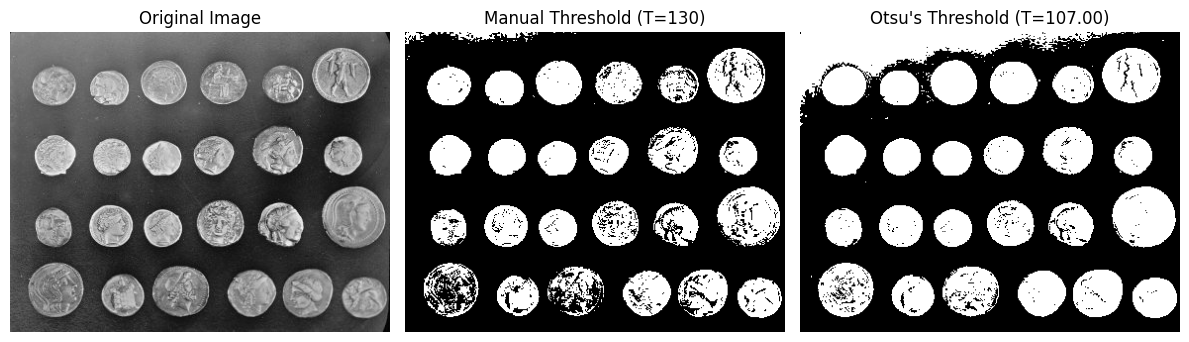

Nilai threshold Otsu yang ditemukan: 107


In [ ]:
import matplotlib.pyplot as plt
from skimage import data, filters, img_as_ubyte
from skimage.color import rgb2gray

# 1. Memuat citra (contoh: coins)
image_coins = data.coins() # Citra sudah grayscale

# 2. Thresholding Global (manual)
# Tentukan nilai ambang manual, misal 100
thresh_manual = 130
binary_manual = image_coins > thresh_manual

# 3. Thresholding Otsu
thresh_otsu = filters.threshold_otsu(image_coins)
binary_otsu = image_coins > thresh_otsu

# 4. Visualisasi Hasil
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
ax = axes.ravel()

ax[0].imshow(image_coins, cmap=plt.cm.gray)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(binary_manual, cmap=plt.cm.gray)
ax[1].set_title(f'Manual Threshold (T={thresh_manual})')
ax[1].axis('off')

ax[2].imshow(binary_otsu, cmap=plt.cm.gray)
ax[2].set_title(f'Otsu\'s Threshold (T={thresh_otsu:.2f})')
ax[2].axis('off')

plt.tight_layout()
plt.show()

# Menampilkan nilai threshold Otsu
print(f"Nilai threshold Otsu yang ditemukan: {thresh_otsu}")


Amati perbedaan hasil segmentasi antara thresholding manual dan Otsu. Apakah metode Otsu  berhasil memisahkan objek (koin) dari latar belakang dengan baik pada citra ini?

**Ya, metode Otsu disini berhasil memisahkan objek (koin) dari latar belakang dengan lebih baik dibandingkan thresholding manual — terutama jika nilai ambang manual tidak dipilih secara optimal. Jika nilai Threshold dipilih manual dan diatas nilai dari Otsu, akan banyak area koin yang dianggap latar belakang.**

# Praktikum 2. Segmentasi Menggunakan Region Growing (Contoh Sederhana)

Praktikum ini mendemonstrasikan konsep dasar region growing. Kita akan menggunakan  fungsi flood dari skimage.segmentation sebagai contoh pendekatan berbasis konektivitas  yang mirip dengan region growing.

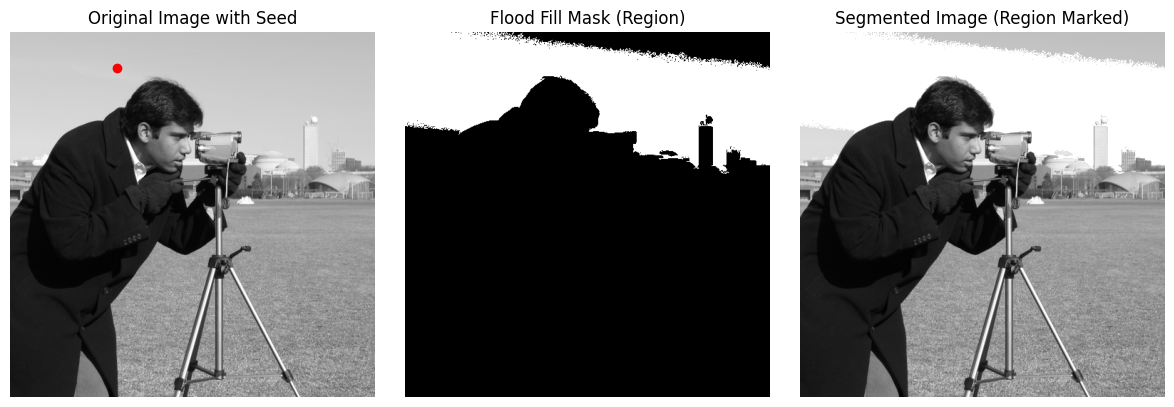

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, segmentation, color

# 1. Memuat citra (contoh: camera)
image_camera = data.camera()

# 2. Tentukan titik 'seed' (benih)
# Misal, kita pilih titik di area langit (misal, koordinat y=50, x=150)
seed_point = (50, 150)

# 3. Terapkan algoritma flood fill (mirip region growing)
# 'tolerance' menentukan seberapa besar perbedaan intensitas yang diizinkan
flood_mask = segmentation.flood(image_camera, seed_point, tolerance=10)

# 4. Buat citra tersegmentasi (tandai region yang 'tumbuh')
segmented_image = np.copy(image_camera)
segmented_image[flood_mask] = 255 # Tandai region dengan warna putih

# 5. Visualisasi Hasil
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
ax = axes.ravel()

ax[0].imshow(image_camera, cmap=plt.cm.gray)
ax[0].plot(seed_point[1], seed_point[0], 'ro') # Tandai seed point
ax[0].set_title('Original Image with Seed')
ax[0].axis('off')

ax[1].imshow(flood_mask, cmap=plt.cm.gray)
ax[1].set_title('Flood Fill Mask (Region)')
ax[1].axis('off')

ax[2].imshow(segmented_image, cmap=plt.cm.gray)
ax[2].set_title('Segmented Image (Region Marked)')
ax[2].axis('off')

plt.tight_layout()
plt.show()

Amati region yang dihasilkan oleh algoritma flood. Bagaimana pengaruh parameter  tolerance terhadap ukuran region yang 'tumbuh'? Cobalah mengubah titik seed dan nilai  tolerance

**Parameter tolerance pada parameter ini menentukan seberapa besar perbedaan intensitas piksel yang masih dianggap "mirip" dengan piksel seed.**

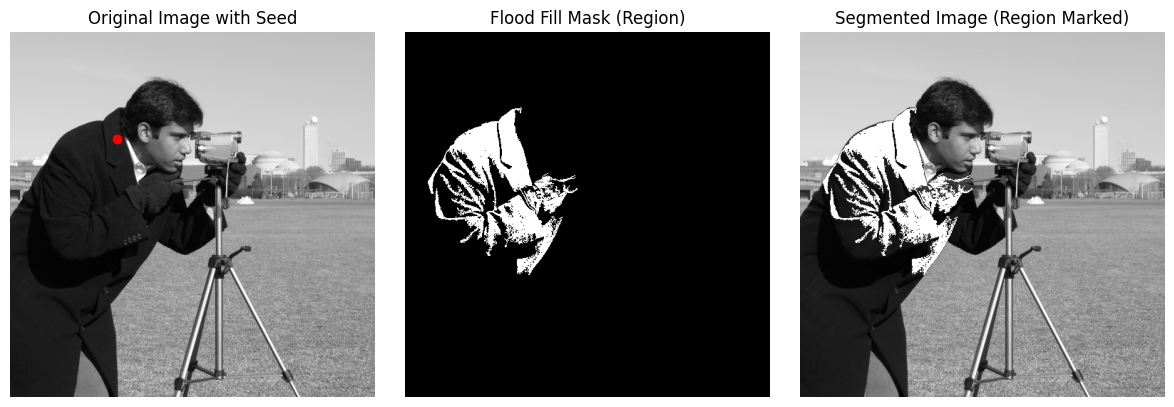

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, segmentation, color

# 1. Memuat citra (contoh: camera)
image_camera = data.camera()

# 2. Tentukan titik 'seed' (benih)
# Misal, kita pilih titik di area langit (misal, koordinat y=50, x=150)
seed_point = (150, 150)

# 3. Terapkan algoritma flood fill (mirip region growing)
# 'tolerance' menentukan seberapa besar perbedaan intensitas yang diizinkan
flood_mask = segmentation.flood(image_camera, seed_point, tolerance=10)

# 4. Buat citra tersegmentasi (tandai region yang 'tumbuh')
segmented_image = np.copy(image_camera)
segmented_image[flood_mask] = 255 # Tandai region dengan warna putih

# 5. Visualisasi Hasil
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
ax = axes.ravel()

ax[0].imshow(image_camera, cmap=plt.cm.gray)
ax[0].plot(seed_point[1], seed_point[0], 'ro') # Tandai seed point
ax[0].set_title('Original Image with Seed')
ax[0].axis('off')

ax[1].imshow(flood_mask, cmap=plt.cm.gray)
ax[1].set_title('Flood Fill Mask (Region)')
ax[1].axis('off')

ax[2].imshow(segmented_image, cmap=plt.cm.gray)
ax[2].set_title('Segmented Image (Region Marked)')
ax[2].axis('off')

plt.tight_layout()
plt.show()

# Praktikum 3. Segmentasi Citra Berwarna Menggunakan K-Means Clustering

Praktikum ini menerapkan K-Means clustering untuk mensegmentasi citra berwarna  berdasarkan nilai warna piksel.

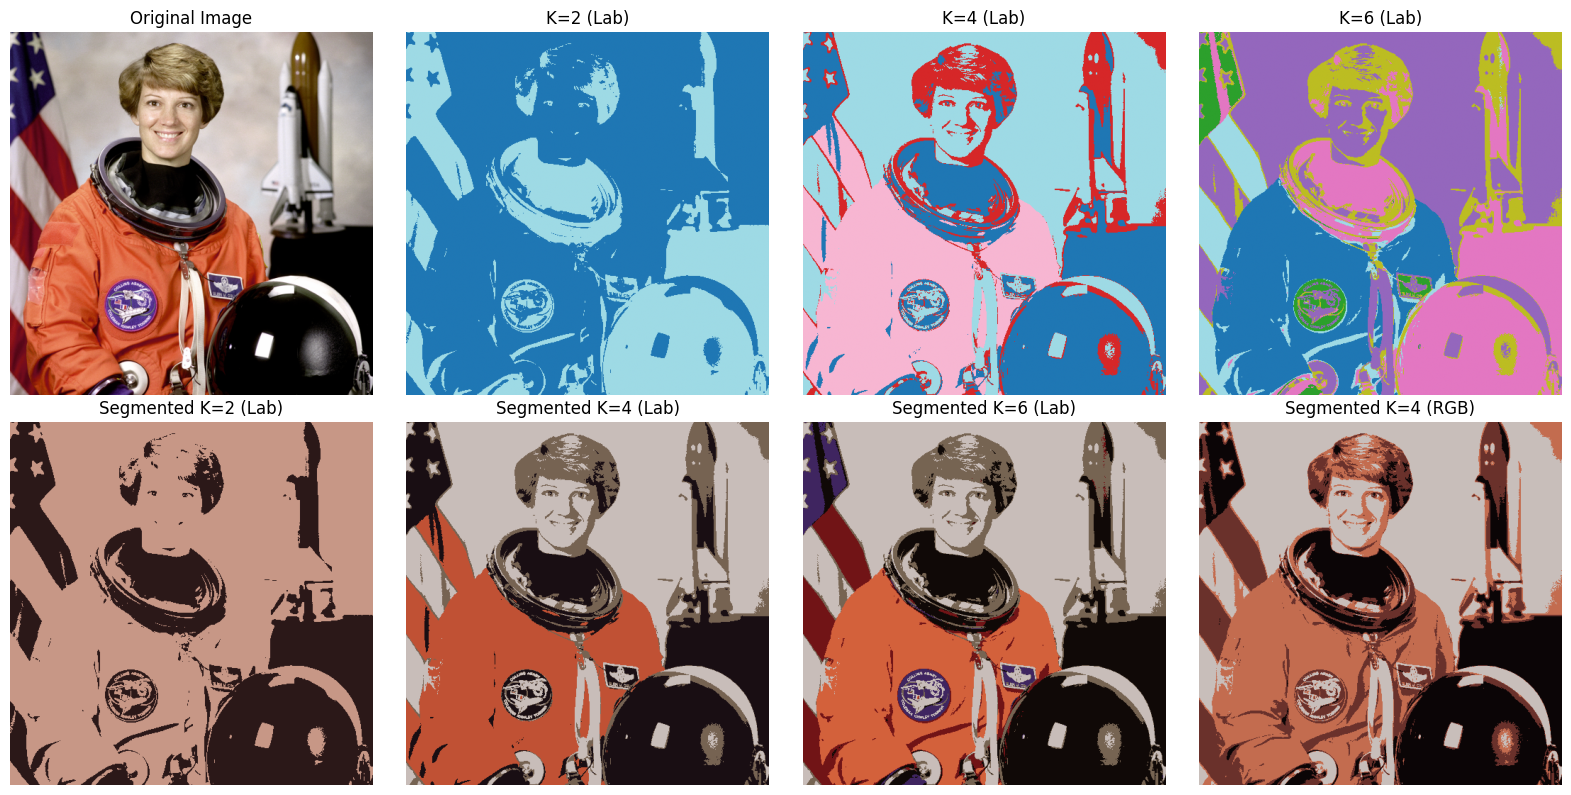

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from sklearn.cluster import KMeans
from skimage.color import rgb2lab, lab2rgb
import warnings

# Load image
image_astro = data.astronaut()
image_astro_float = image_astro.astype(float) / 255.0

# Function to segment image using K-Means and a color space
def segment_kmeans(image_float, n_clusters, use_lab=True):
    if use_lab:
        image_color = rgb2lab(image_float)
    else:
        image_color = image_float  # use RGB directly

    rows, cols, dims = image_color.shape
    pixels = image_color.reshape(rows * cols, dims)

    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        labels = kmeans.fit_predict(pixels)

    label_image = labels.reshape(rows, cols)

    segmented = np.zeros_like(image_color)
    centers = kmeans.cluster_centers_
    for k in range(n_clusters):
        mask = (labels == k).reshape(rows, cols)
        segmented[mask] = centers[k]

    # Convert back to RGB if needed
    if use_lab:
        segmented_rgb = lab2rgb(segmented)
    else:
        segmented_rgb = segmented

    return label_image, segmented_rgb

# Segmentations
label_k2, seg_k2 = segment_kmeans(image_astro_float, 2)
label_k4_lab, seg_k4_lab = segment_kmeans(image_astro_float, 4, use_lab=True)
label_k6, seg_k6 = segment_kmeans(image_astro_float, 6)
label_k4_rgb, seg_k4_rgb = segment_kmeans(image_astro_float, 4, use_lab=False)

# Visualization
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
ax = axes.ravel()

ax[0].imshow(image_astro)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(label_k2, cmap='tab20')
ax[1].set_title('K=2 (Lab)')
ax[1].axis('off')

ax[2].imshow(label_k4_lab, cmap='tab20')
ax[2].set_title('K=4 (Lab)')
ax[2].axis('off')

ax[3].imshow(label_k6, cmap='tab20')
ax[3].set_title('K=6 (Lab)')
ax[3].axis('off')

ax[4].imshow(seg_k2)
ax[4].set_title('Segmented K=2 (Lab)')
ax[4].axis('off')

ax[5].imshow(seg_k4_lab)
ax[5].set_title('Segmented K=4 (Lab)')
ax[5].axis('off')

ax[6].imshow(seg_k6)
ax[6].set_title('Segmented K=6 (Lab)')
ax[6].axis('off')

ax[7].imshow(seg_k4_rgb)
ax[7].set_title('Segmented K=4 (RGB)')
ax[7].axis('off')

plt.tight_layout()
plt.show()


Amati hasil segmentasi K-Means. Apakah jumlah klaster (K) mempengaruhi hasil segmentasi  secara signifikan? Cobalah mengubah nilai K. Apakah penggunaan ruang warna Lab  membantu?

**Ya, jumlah klaster (K) sangat memengaruhi hasil segmentasi dengan K-Means, dan penggunaan ruang warna Lab umumnya membantu menghasilkan segmentasi yang lebih relevan secara visual. Berikut penjelasannya:**

Pengaruh Jumlah Klaster (K):
Kecil (misal, K=2 atau 3):

Segmentasi kasar.

Citra terbagi hanya ke dalam sedikit wilayah dominan (misal latar vs objek utama).

Detail halus (seperti wajah atau baju pada citra astronaut) cenderung hilang.

Besar (misal, K=6 atau 8):

Segmentasi lebih rinci.

Warna-warna dan detail tekstur lebih terpisah.

Tapi terlalu besar bisa menimbulkan oversegmentation (terlalu banyak fragmen kecil yang tidak bermakna).

 Pengaruh Penggunaan Ruang Warna Lab:
Lab memisahkan komponen luminance (L) dan chrominance (a, b), sehingga:

Persepsi perbedaan warna manusia lebih ditangkap dengan baik.

Segmentasi lebih sesuai dengan batas alami antar objek.

RGB bisa gagal saat warna serupa memiliki pencahayaan berbeda (misalnya area terang dan gelap pada wajah tetap dianggap berbeda dalam RGB, tapi bisa serupa di Lab).

# Praktikum 4. Segmentasi Berbasis Tepi Menggunakan Watershed

Praktikum ini memperkenalkan algoritma Watershed, yang sering digunakan untuk  memisahkan objek yang saling bersentuhan. Algoritma ini memperlakukan citra seperti relief  topografi dan mengisi 'cekungan' (basin) dengan air. Kita akan menggunakan gradien citra  sebagai input topografi.

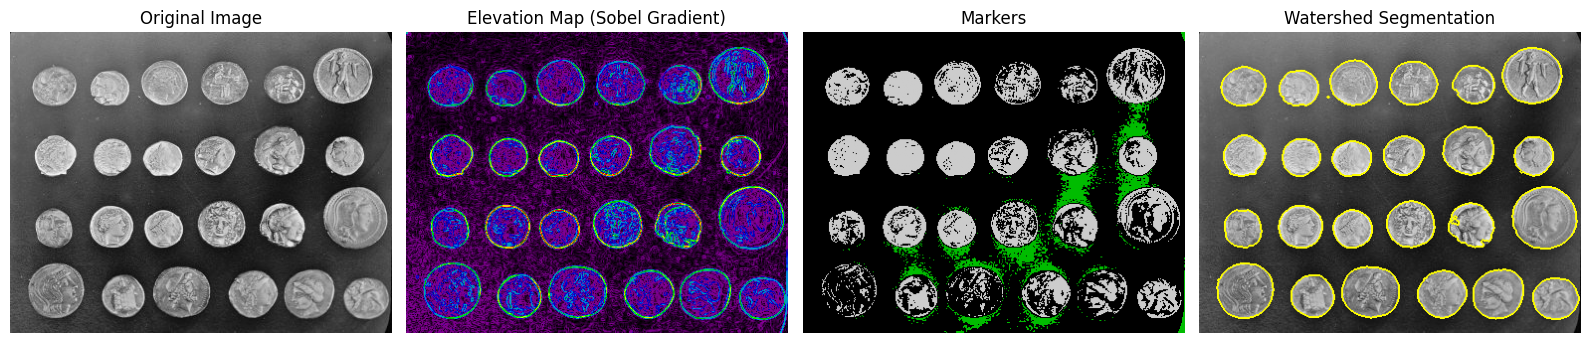

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, segmentation, morphology, measure
from scipy import ndimage as ndi

# 1. Memuat citra (contoh: coins)
image_coins = data.coins()

# 2. Hitung gradien citra (sebagai 'topografi')
elevation_map = filters.sobel(image_coins)

# 3. Tentukan marker (penanda awal untuk setiap cekungan/objek)
# Kita bisa menggunakan thresholding untuk mendapatkan marker kasar
markers = np.zeros_like(image_coins)
markers[image_coins < 30] = 1  # Marker untuk latar belakang
markers[image_coins > 150] = 2  # Marker untuk objek (koin)

# Atau gunakan marker dari local maxima (lebih canggih)
# from skimage.feature import peak_local_max
# image_max = ndi.maximum_filter(image_coins, size=20, mode='constant')
# coordinates = peak_local_max(image_coins, min_distance=20)
# markers = np.zeros(image_coins.shape, dtype=bool)
# markers[tuple(coordinates.T)] = True
# markers = measure.label(markers)

# 4. Terapkan algoritma Watershed
segmentation_watershed = segmentation.watershed(elevation_map, markers)

# Warnai hasil segmentasi untuk visualisasi
segmented_colored = segmentation.mark_boundaries(image_coins, segmentation_watershed)

# 5. Visualisasi Hasil
fig, axes = plt.subplots(ncols=4, figsize=(16, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image_coins, cmap=plt.cm.gray)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(elevation_map, cmap=plt.cm.nipy_spectral)
ax[1].set_title('Elevation Map (Sobel Gradient)')
ax[1].axis('off')

ax[2].imshow(markers, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Markers')
ax[2].axis('off')

ax[3].imshow(segmented_colored)
ax[3].set_title('Watershed Segmentation')
ax[3].axis('off')

plt.tight_layout()
plt.show()

Amati bagaimana algoritma Watershed menggunakan gradien dan marker untuk memisahkan  objek. Bagaimana pemilihan marker mempengaruhi hasil akhir? Apa yang terjadi jika marker  tidak tepat?

Algoritma Watershed bekerja dengan konsep membanjiri "topografi" citra berdasarkan gradien (misalnya dari Sobel), dan membiarkan air mengalir dari marker (penanda awal) untuk mengisi lembah (cekungan). Proses ini sangat dipengaruhi oleh penempatan marker dan bentuk gradien.

Cara Kerja Secara Singkat:
Gradien (misalnya dari Sobel) menggambarkan tepi atau batas objek sebagai "punggungan" topografi.

Marker adalah titik awal yang ditetapkan untuk objek dan latar belakang.

Air "mengalir" dari setiap marker, mengikuti gradien. Ketika dua aliran bertemu, terbentuk garis pemisah (segmen).

# Praktikum 5. Perbandingan Visual Hasil Segmentasi

Praktikum ini bertujuan membandingkan hasil dari beberapa metode segmentasi yang telah  dipelajari pada citra yang sama untuk melihat perbedaan, kelebihan, dan kekurangan masing masing secara visual.

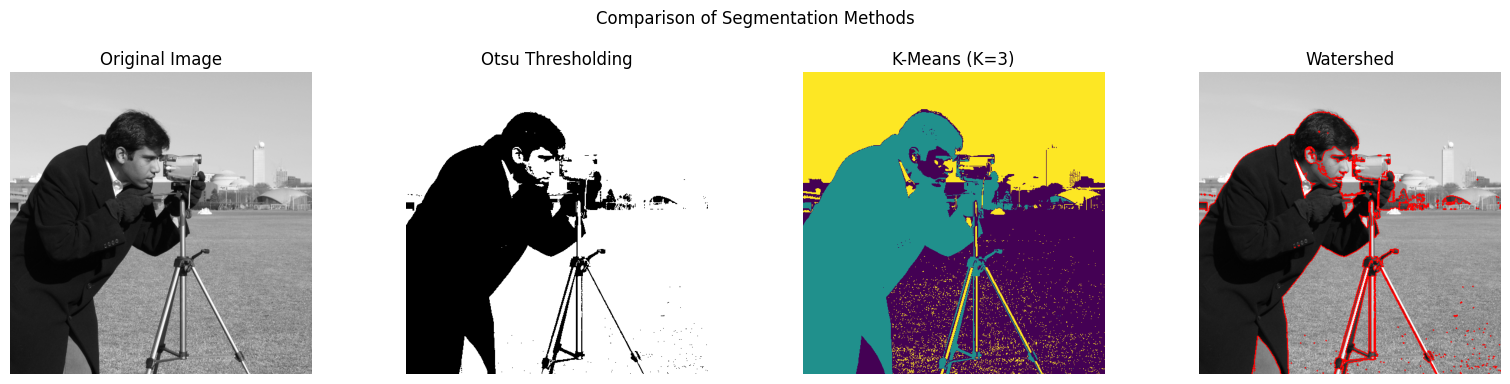

In [ ]:
import matplotlib.pyplot as plt
from skimage import data, filters, segmentation, img_as_float, color
from sklearn.cluster import KMeans
import numpy as np
import warnings

# 1. Pilih satu citra untuk perbandingan (misal: camera)
image = data.camera()
image_float = img_as_float(image)

# 2. Lakukan beberapa metode segmentasi
# a) Otsu Thresholding
thresh_otsu = filters.threshold_otsu(image)
binary_otsu = image > thresh_otsu

# b) K-Means (misal K=3)
# Reshape untuk K-Means (1 fitur: intensitas)
rows, cols = image.shape
pixel_features = image_float.reshape(rows * cols, 1)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    pixel_labels = kmeans.fit_predict(pixel_features)
segmented_kmeans_labels = pixel_labels.reshape(rows, cols)

# c) Watershed (gunakan marker sederhana dari Otsu)
elevation_map = filters.sobel(image)
markers = np.zeros_like(image)
markers[image < thresh_otsu] = 1
markers[image > thresh_otsu] = 2
segmentation_watershed = segmentation.watershed(elevation_map, markers)

# 3. Visualisasi Perbandingan
fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(binary_otsu, cmap=plt.cm.gray)
ax[1].set_title('Otsu Thresholding')
ax[1].axis('off')

ax[2].imshow(segmented_kmeans_labels, cmap='viridis') # Gunakan cmap berbeda untuk label
ax[2].set_title(f'K-Means (K={n_clusters})')
ax[2].axis('off')

# Gunakan mark_boundaries untuk Watershed agar lebih jelas
segmented_watershed_colored = segmentation.mark_boundaries(image_float, segmentation_watershed, color=(1,0,0)) # Batas merah
ax[3].imshow(segmented_watershed_colored)
ax[3].set_title('Watershed')
ax[3].axis('off')

plt.suptitle('Comparison of Segmentation Methods')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle
plt.show()

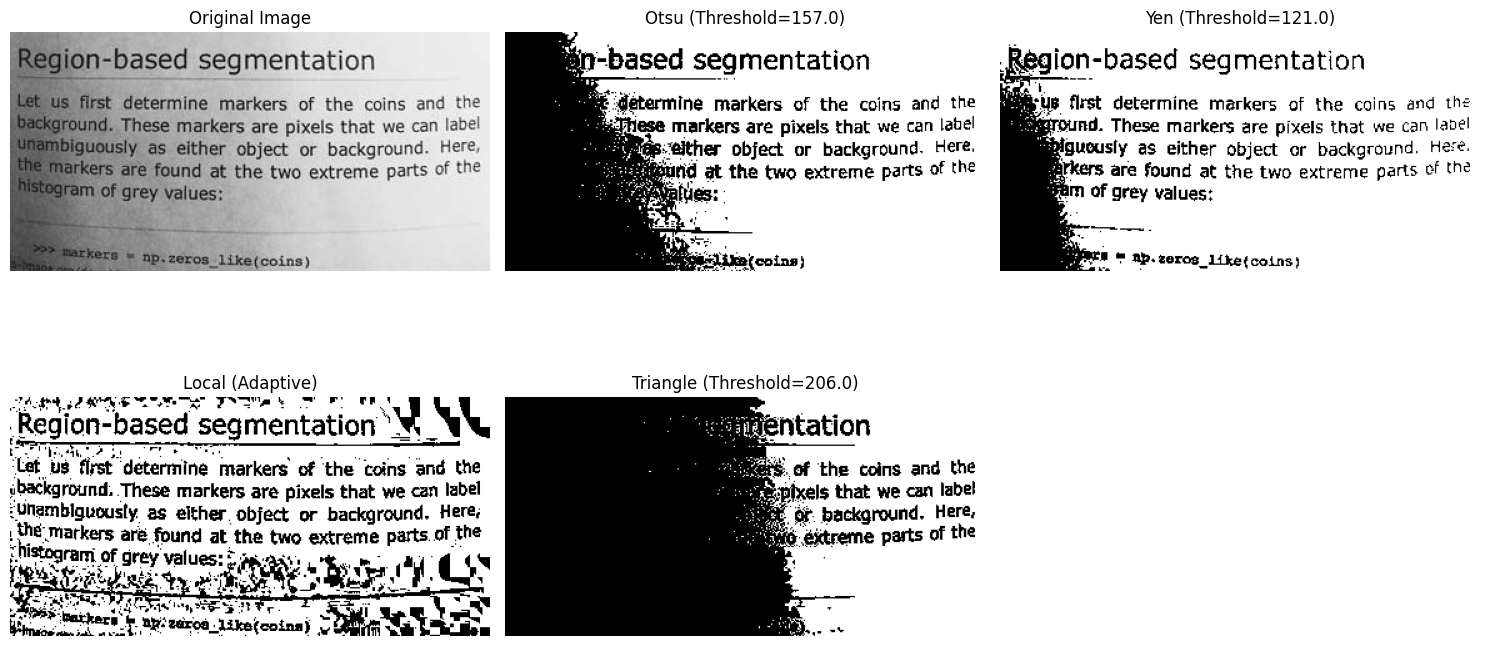

In [ ]:
import matplotlib.pyplot as plt
from skimage import data, filters
import numpy as np

# Load citra
image = data.page()
image_float = image.astype(np.float32) / 255  # Normalisasi ke [0,1]

# 1. Otsu Thresholding
thresh_otsu = filters.threshold_otsu(image)
binary_otsu = image > thresh_otsu

# 2. Yen Thresholding
thresh_yen = filters.threshold_yen(image)
binary_yen = image > thresh_yen

# 3. Local Thresholding (Adaptive)
binary_local = image > filters.threshold_local(image, block_size=35, offset=0.1)

# 4. Triangle Thresholding
thresh_triangle = filters.threshold_triangle(image)
binary_triangle = image > thresh_triangle

# Visualisasi
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(binary_otsu, cmap='gray')
ax[1].set_title(f'Otsu (Threshold={thresh_otsu:.1f})')
ax[1].axis('off')

ax[2].imshow(binary_yen, cmap='gray')
ax[2].set_title(f'Yen (Threshold={thresh_yen:.1f})')
ax[2].axis('off')

ax[3].imshow(binary_local, cmap='gray')
ax[3].set_title('Local (Adaptive)')
ax[3].axis('off')

ax[4].imshow(binary_triangle, cmap='gray')
ax[4].set_title(f'Triangle (Threshold={thresh_triangle:.1f})')
ax[4].axis('off')

fig.delaxes(ax[5])  # Hapus subplot kosong
plt.tight_layout()
plt.show()

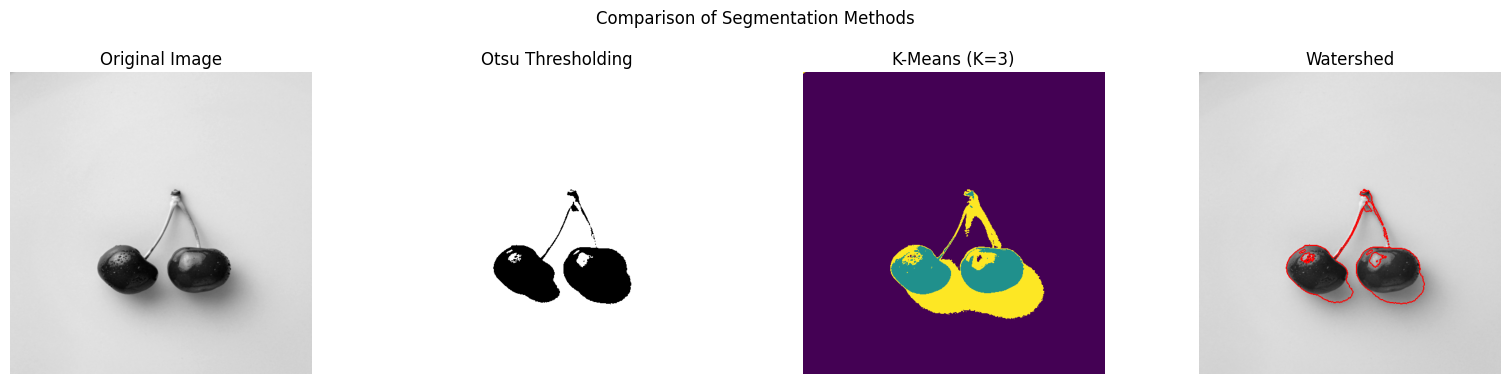

In [ ]:
import matplotlib.pyplot as plt
from skimage import filters, segmentation, img_as_float, color, io
from sklearn.cluster import KMeans
import numpy as np
import warnings
from skimage.transform import resize

def load_and_preprocess_image(image_path, target_size=None):
    """Load and preprocess an image from file path"""
    image = io.imread(image_path)
    if len(image.shape) == 3:  # Convert color to grayscale
        image = color.rgb2gray(image)
    if target_size:
        image = resize(image, target_size, anti_aliasing=True)
    return (image * 255).astype(np.uint8)  # Scale to 0-255

# 1. Load your own image (change the path to your image file)
image_path = 'slice.jpg'  # Replace with your image path
image = load_and_preprocess_image(image_path, target_size=(512, 512))  # Optional resizing
image_float = img_as_float(image)

# 2. Perform segmentation methods
# a) Otsu Thresholding
thresh_otsu = filters.threshold_otsu(image)
binary_otsu = image > thresh_otsu

# b) K-Means (example K=3)
rows, cols = image.shape
pixel_features = image_float.reshape(rows * cols, 1)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    pixel_labels = kmeans.fit_predict(pixel_features)
segmented_kmeans_labels = pixel_labels.reshape(rows, cols)

# c) Watershed (using simple markers from Otsu)
elevation_map = filters.sobel(image)
markers = np.zeros_like(image)
markers[image < thresh_otsu] = 1
markers[image > thresh_otsu] = 2
segmentation_watershed = segmentation.watershed(elevation_map, markers)

# 3. Visualization Comparison
fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(binary_otsu, cmap=plt.cm.gray)
ax[1].set_title('Otsu Thresholding')
ax[1].axis('off')

ax[2].imshow(segmented_kmeans_labels, cmap='viridis')
ax[2].set_title(f'K-Means (K={n_clusters})')
ax[2].axis('off')

segmented_watershed_colored = segmentation.mark_boundaries(image_float, segmentation_watershed, color=(1,0,0))
ax[3].imshow(segmented_watershed_colored)
ax[3].set_title('Watershed')
ax[3].axis('off')

plt.suptitle('Comparison of Segmentation Methods')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

1. Otsu Thresholding
Kelebihan: Sederhana, cepat, efektif untuk kontras tinggi.

- Kekurangan: Hasil kasar dan biner, kehilangan detail seperti tangkai, serta tidak bisa memisahkan objek yang saling menyatu (kedua buah).

- Cocok: Kurang cocok untuk citra ini karena objek dan latar belakang tidak memiliki kontras yang sangat tinggi di seluruh area.

2. K-Means (K=3)
- Kelebihan: Mampu membedakan bagian-bagian berbeda berdasarkan warna atau intensitas.

- Kekurangan: Tidak ada batas objek yang jelas; hasil cenderung berbentuk klaster yang belum tentu mengikuti bentuk asli objek.

- Cocok: Agak cocok untuk mendeteksi warna dominan, tetapi kurang presisi dalam batas objek.

3. Watershed
- Kelebihan: Memberikan segmentasi batas yang jelas antar objek, bahkan saat objek saling menyatu.

- Kekurangan: Sensitif terhadap noise, memerlukan preprocessing (seperti distance transform dan marker).

- Cocok: Paling cocok untuk citra ini karena mampu memisahkan kedua buah ceri dengan baik dan mengikuti kontur nyata objek, termasuk tangkai.

4 Kesimpulan: Metode Paling Cocok
Watershed adalah metode yang paling sesuai untuk citra ini karena:

- Dapat memisahkan objek yang saling bersentuhan (dua ceri).

- Memiliki segmentasi yang mendekati bentuk asli objek.

- Menyediakan informasi kontur objek secara akurat.

